https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

In [1]:
import numpy as np
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
corpus_text = "He is the king . The king is royal . She is the royal  queen "

In [4]:
# convert to lower case
corpus_text = corpus_text.lower()

**We need to convert this to an <font color='red'>(input output pair)</font> such that if we input a word, <font color='blue'>*it should it predict that the neighbouring words*</font> : the n words before and after it, where n is the parameter window_size Here’s a handy example from this amazing post on word2vec by Chris McCormick.**

In [10]:
words = []

for word in corpus_text.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed

word2int = {}
int2word = {}

vocab_size = len(words) # gives the total number of unique words

#Enumerate gives word and index
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [7]:
word2int

{'he': 0, 'is': 1, 'king': 5, 'queen': 3, 'royal': 4, 'she': 2, 'the': 6}

In [8]:
int2word

{0: 'he', 1: 'is', 2: 'she', 3: 'queen', 4: 'royal', 5: 'king', 6: 'the'}

In [9]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [11]:
print(word2int['queen'])

3


In [13]:
print(int2word[3])

queen


## Now, we want a list of our sentences as a list of words:

In [15]:
# raw sentences is a list of sentences.
raw_sentences = corpus_text.split('.')

sentences = []

for sentence in raw_sentences:
    sentences.append(sentence.split())

In [16]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

### Now, we will generate our training data:

In [20]:
data = []

WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            #print(sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1])
            if nb_word != word:
                data.append([word, nb_word])

In [21]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

#### We have our training data. But it needs to be represented in a way a computer can understand i.e., with numbers. That’s where our word2int dict comes handy.

In [26]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    #print(data_point_index)
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

#refer vocab_size in IN[10]
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [27]:
x_train

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
 

In [28]:
y_train

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

In [29]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


## Make the tensorflow model

In [30]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

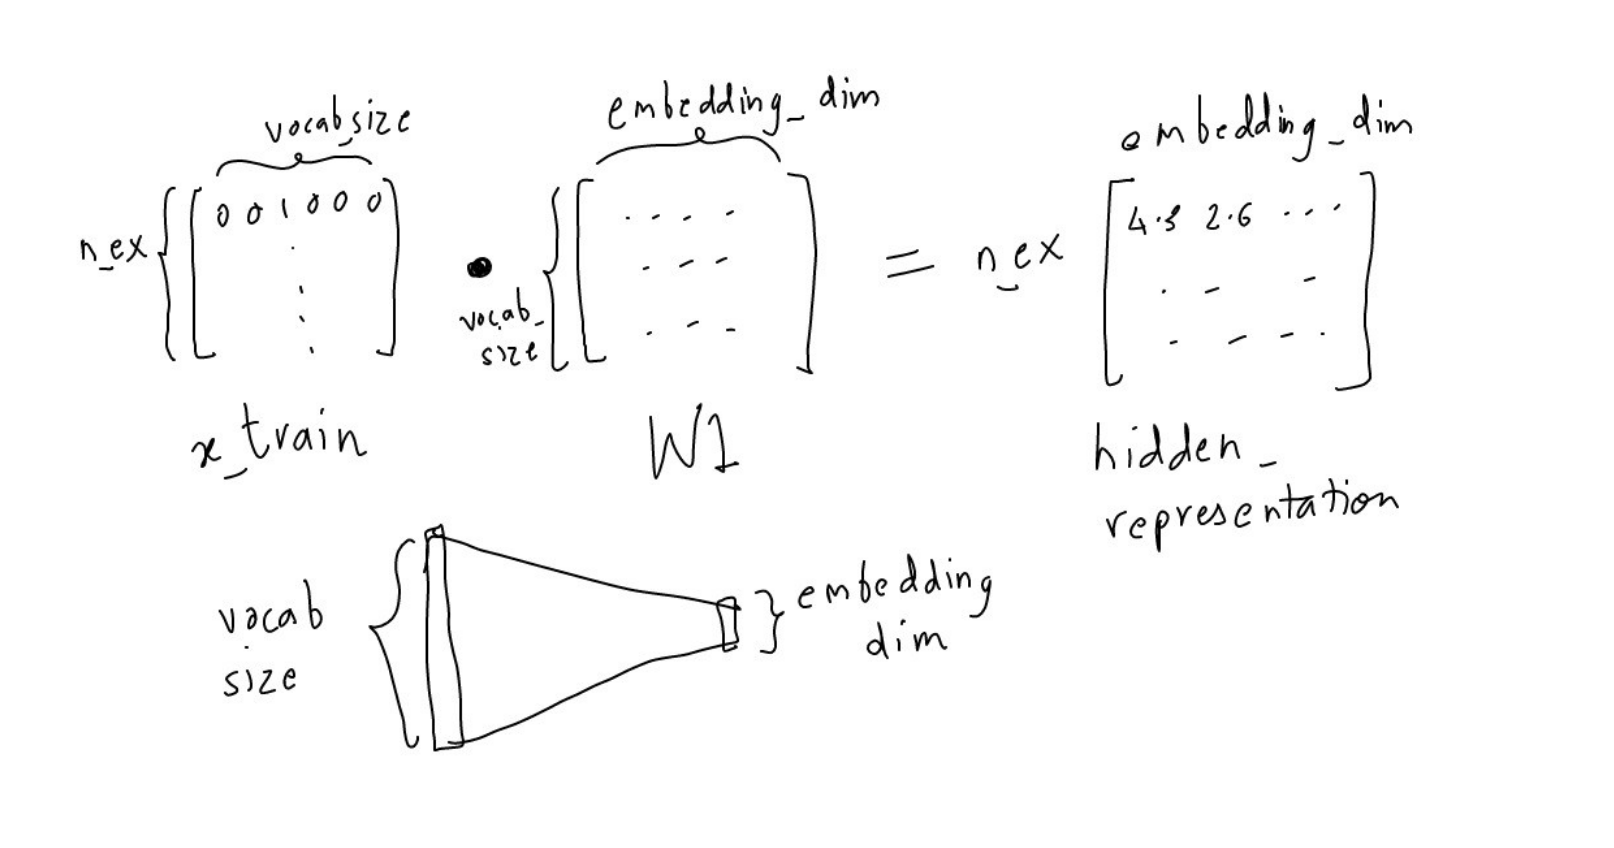

In [47]:
from IPython.display import Image
Image(filename='/Users/sayedali/Desktop/screenshot/S.png')

In [39]:
EMBEDDING_DIM = 5 # you can choose your own number

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))

b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias

hidden_representation = tf.add(tf.matmul(x,W1), b1)

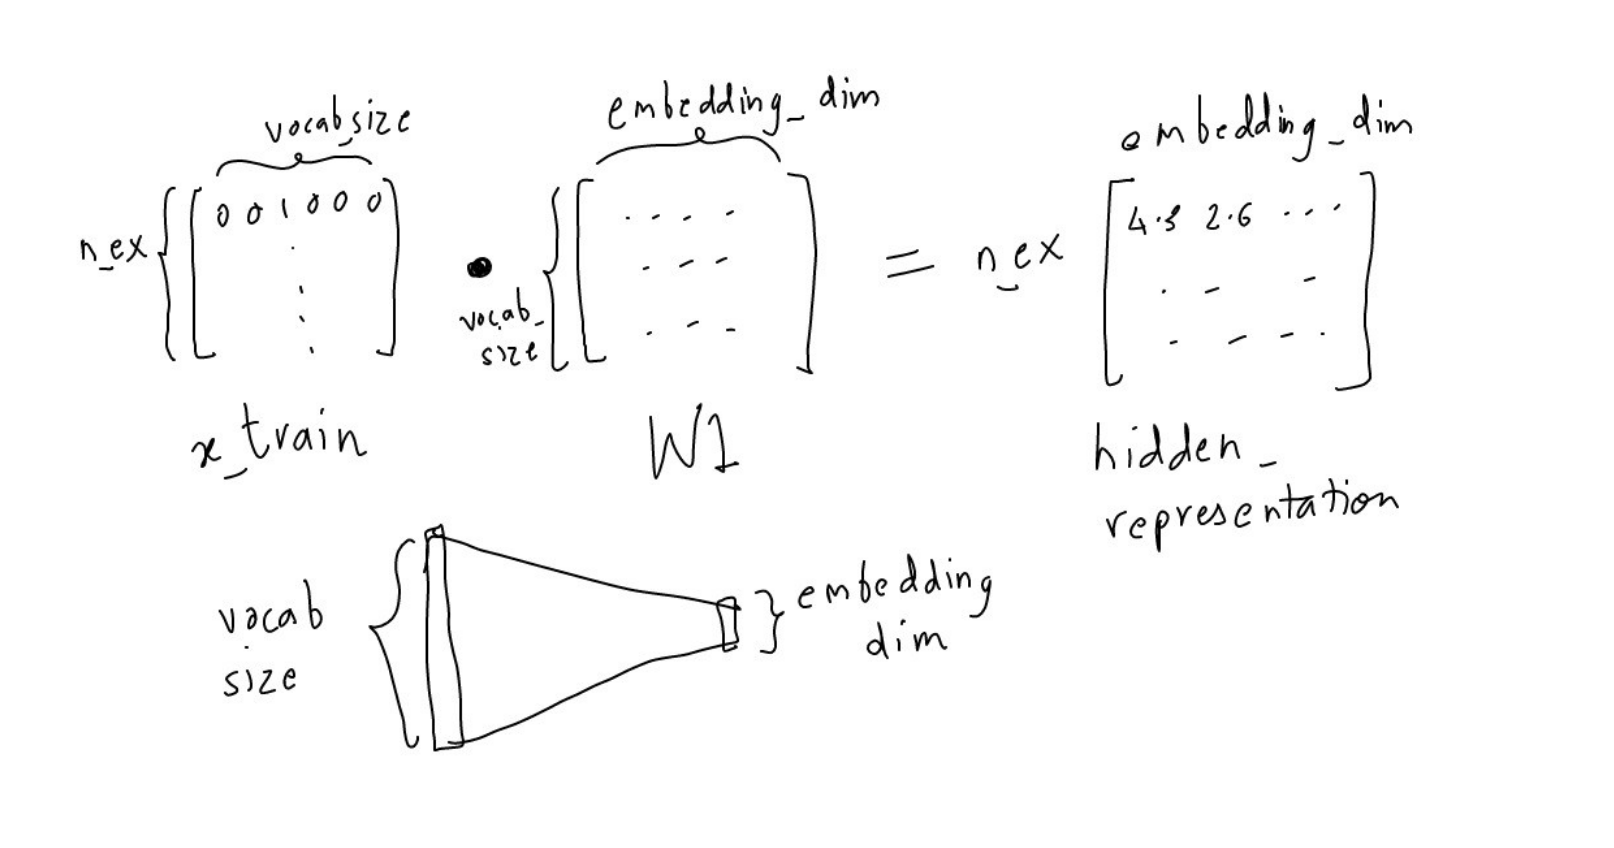

In [50]:
Image(filename='/Users/sayedali/Desktop/screenshot/S.png')

In [32]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))

b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

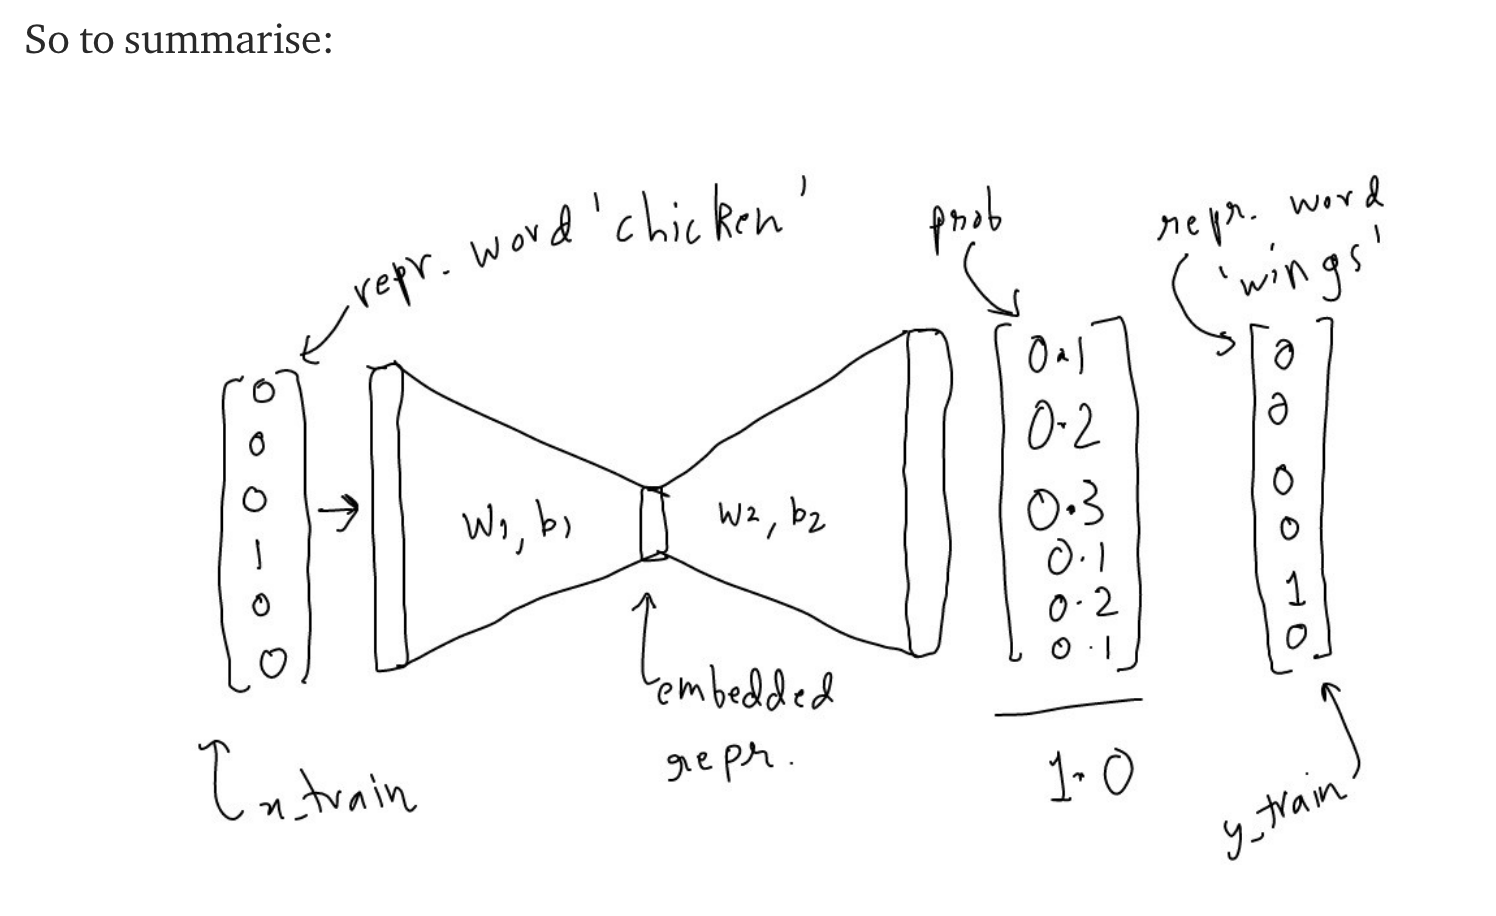

In [51]:
Image(filename="/Users/sayedali/Desktop/screenshot/S2.png")

**input_one_hot  --->  embedded repr. ---> predicted_neighbour_prob
<br>
predicted_prob will be compared against a one hot vector to correct it.**

## Train

In [52]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000

# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})

    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  3.1290684
loss is :  2.912112
loss is :  2.7467997
loss is :  2.61726
loss is :  2.5136783
loss is :  2.4292507
loss is :  2.3589532
loss is :  2.2990499
loss is :  2.2468452
loss is :  2.200471
loss is :  2.1586857
loss is :  2.1206882
loss is :  2.0859709
loss is :  2.0542028
loss is :  2.0251544
loss is :  1.9986442
loss is :  1.9745084
loss is :  1.952582
loss is :  1.9326917
loss is :  1.9146565
loss is :  1.8982894
loss is :  1.8834038
loss is :  1.8698201
loss is :  1.8573687
loss is :  1.8458959
loss is :  1.8352649
loss is :  1.8253566
loss is :  1.8160689
loss is :  1.807316
loss is :  1.7990257
loss is :  1.791139
loss is :  1.7836065
loss is :  1.7763877
loss is :  1.7694491
loss is :  1.7627633
loss is :  1.7563071
loss is :  1.7500618
loss is :  1.7440104
loss is :  1.7381406
loss is :  1.7324396
loss is :  1.7268982
loss is :  1.7215071
loss is :  1.7162597
loss is :  1.7111484
loss is :  1.7061679
loss is :  1.7013129
loss is :  1.6965785
loss is :  1.6919605

loss is :  1.3766749
loss is :  1.376394
loss is :  1.3761148
loss is :  1.3758371
loss is :  1.375561
loss is :  1.3752863
loss is :  1.3750131
loss is :  1.3747414
loss is :  1.3744713
loss is :  1.3742026
loss is :  1.3739356
loss is :  1.3736699
loss is :  1.3734059
loss is :  1.3731432
loss is :  1.372882
loss is :  1.3726224
loss is :  1.3723643
loss is :  1.3721075
loss is :  1.3718524
loss is :  1.3715985
loss is :  1.3713464
loss is :  1.3710957
loss is :  1.3708462
loss is :  1.3705983
loss is :  1.3703519
loss is :  1.3701067
loss is :  1.3698632
loss is :  1.369621
loss is :  1.3693801
loss is :  1.369141
loss is :  1.368903
loss is :  1.3686665
loss is :  1.3684314
loss is :  1.3681977
loss is :  1.3679655
loss is :  1.3677344
loss is :  1.3675048
loss is :  1.3672769
loss is :  1.36705
loss is :  1.3668246
loss is :  1.3666008
loss is :  1.3663778
loss is :  1.3661567
loss is :  1.3659368
loss is :  1.3657181
loss is :  1.3655008
loss is :  1.3652849
loss is :  1.3650703


loss is :  1.3340564
loss is :  1.3340253
loss is :  1.3339939
loss is :  1.3339628
loss is :  1.3339319
loss is :  1.3339012
loss is :  1.3338704
loss is :  1.3338399
loss is :  1.3338094
loss is :  1.333779
loss is :  1.3337488
loss is :  1.3337187
loss is :  1.3336887
loss is :  1.3336589
loss is :  1.3336291
loss is :  1.3335996
loss is :  1.3335699
loss is :  1.3335407
loss is :  1.3335114
loss is :  1.333482
loss is :  1.3334532
loss is :  1.3334242
loss is :  1.3333954
loss is :  1.3333666
loss is :  1.333338
loss is :  1.3333097
loss is :  1.3332812
loss is :  1.3332529
loss is :  1.3332249
loss is :  1.3331966
loss is :  1.3331687
loss is :  1.3331411
loss is :  1.3331134
loss is :  1.3330857
loss is :  1.3330582
loss is :  1.3330307
loss is :  1.3330034
loss is :  1.3329762
loss is :  1.3329492
loss is :  1.3329221
loss is :  1.3328952
loss is :  1.3328685
loss is :  1.3328415
loss is :  1.3328152
loss is :  1.3327886
loss is :  1.3327624
loss is :  1.332736
loss is :  1.3327

loss is :  1.3268785
loss is :  1.3268701
loss is :  1.3268617
loss is :  1.3268536
loss is :  1.3268453
loss is :  1.3268371
loss is :  1.326829
loss is :  1.3268207
loss is :  1.3268125
loss is :  1.3268042
loss is :  1.3267962
loss is :  1.3267882
loss is :  1.32678
loss is :  1.3267717
loss is :  1.3267639
loss is :  1.3267558
loss is :  1.3267478
loss is :  1.3267399
loss is :  1.3267318
loss is :  1.3267239
loss is :  1.326716
loss is :  1.3267078
loss is :  1.3267
loss is :  1.3266922
loss is :  1.3266842
loss is :  1.3266764
loss is :  1.3266686
loss is :  1.3266609
loss is :  1.3266529
loss is :  1.3266451
loss is :  1.3266375
loss is :  1.3266296
loss is :  1.3266218
loss is :  1.3266143
loss is :  1.3266065
loss is :  1.3265988
loss is :  1.3265911
loss is :  1.3265834
loss is :  1.3265759
loss is :  1.3265682
loss is :  1.3265605
loss is :  1.3265531
loss is :  1.3265455
loss is :  1.3265378
loss is :  1.3265303
loss is :  1.326523
loss is :  1.3265154
loss is :  1.3265079


loss is :  1.3243574
loss is :  1.3243539
loss is :  1.3243507
loss is :  1.3243474
loss is :  1.3243438
loss is :  1.3243406
loss is :  1.3243371
loss is :  1.3243339
loss is :  1.3243304
loss is :  1.3243271
loss is :  1.3243239
loss is :  1.3243204
loss is :  1.3243172
loss is :  1.3243138
loss is :  1.3243105
loss is :  1.3243072
loss is :  1.3243039
loss is :  1.3243005
loss is :  1.3242973
loss is :  1.3242941
loss is :  1.3242906
loss is :  1.3242874
loss is :  1.3242841
loss is :  1.3242809
loss is :  1.3242776
loss is :  1.3242744
loss is :  1.3242712
loss is :  1.3242677
loss is :  1.3242646
loss is :  1.3242614
loss is :  1.3242581
loss is :  1.3242551
loss is :  1.3242518
loss is :  1.3242484
loss is :  1.3242452
loss is :  1.3242421
loss is :  1.3242388
loss is :  1.3242357
loss is :  1.3242325
loss is :  1.3242292
loss is :  1.3242261
loss is :  1.3242228
loss is :  1.3242197
loss is :  1.3242165
loss is :  1.3242134
loss is :  1.3242102
loss is :  1.3242071
loss is :  1.

loss is :  1.323321
loss is :  1.3233192
loss is :  1.3233172
loss is :  1.3233154
loss is :  1.3233134
loss is :  1.3233114
loss is :  1.3233095
loss is :  1.3233076
loss is :  1.3233057
loss is :  1.3233037
loss is :  1.3233018
loss is :  1.3233
loss is :  1.3232979
loss is :  1.3232961
loss is :  1.3232942
loss is :  1.3232923
loss is :  1.3232903
loss is :  1.3232883
loss is :  1.3232865
loss is :  1.3232847
loss is :  1.3232828
loss is :  1.3232809
loss is :  1.323279
loss is :  1.3232771
loss is :  1.3232752
loss is :  1.3232735
loss is :  1.3232714
loss is :  1.3232696
loss is :  1.3232678
loss is :  1.3232659
loss is :  1.323264
loss is :  1.3232622
loss is :  1.3232602
loss is :  1.3232584
loss is :  1.3232565
loss is :  1.3232546
loss is :  1.3232528
loss is :  1.3232509
loss is :  1.3232491
loss is :  1.3232472
loss is :  1.3232454
loss is :  1.3232435
loss is :  1.3232417
loss is :  1.3232398
loss is :  1.323238
loss is :  1.3232361
loss is :  1.3232343
loss is :  1.3232324

loss is :  1.3226156
loss is :  1.3226142
loss is :  1.3226134
loss is :  1.3226119
loss is :  1.322611
loss is :  1.3226098
loss is :  1.3226085
loss is :  1.3226074
loss is :  1.3226062
loss is :  1.3226051
loss is :  1.322604
loss is :  1.3226029
loss is :  1.3226016
loss is :  1.3226005
loss is :  1.3225994
loss is :  1.3225982
loss is :  1.322597
loss is :  1.3225961
loss is :  1.3225948
loss is :  1.3225938
loss is :  1.3225926
loss is :  1.3225913
loss is :  1.3225902
loss is :  1.3225892
loss is :  1.3225881
loss is :  1.3225869
loss is :  1.3225857
loss is :  1.3225846
loss is :  1.3225834
loss is :  1.3225822
loss is :  1.3225813
loss is :  1.3225801
loss is :  1.3225789
loss is :  1.3225777
loss is :  1.3225768
loss is :  1.3225756
loss is :  1.3225746
loss is :  1.3225733
loss is :  1.3225722
loss is :  1.3225712
loss is :  1.3225698
loss is :  1.3225689
loss is :  1.3225678
loss is :  1.3225666
loss is :  1.3225657
loss is :  1.3225644
loss is :  1.3225633
loss is :  1.322

loss is :  1.3221945
loss is :  1.3221939
loss is :  1.3221929
loss is :  1.3221922
loss is :  1.3221915
loss is :  1.3221905
loss is :  1.32219
loss is :  1.322189
loss is :  1.3221884
loss is :  1.3221877
loss is :  1.3221867
loss is :  1.3221861
loss is :  1.3221852
loss is :  1.3221846
loss is :  1.3221837
loss is :  1.3221829
loss is :  1.3221822
loss is :  1.3221813
loss is :  1.3221807
loss is :  1.3221798
loss is :  1.3221791
loss is :  1.3221784
loss is :  1.3221776
loss is :  1.3221768
loss is :  1.3221761
loss is :  1.3221751
loss is :  1.3221745
loss is :  1.3221737
loss is :  1.322173
loss is :  1.3221722
loss is :  1.3221714
loss is :  1.3221706
loss is :  1.3221699
loss is :  1.3221692
loss is :  1.3221684
loss is :  1.3221675
loss is :  1.3221669
loss is :  1.322166
loss is :  1.3221654
loss is :  1.3221644
loss is :  1.3221636
loss is :  1.3221629
loss is :  1.3221622
loss is :  1.3221614
loss is :  1.3221607
loss is :  1.3221599
loss is :  1.322159
loss is :  1.322158

loss is :  1.3219142
loss is :  1.3219137
loss is :  1.3219131
loss is :  1.3219125
loss is :  1.3219118
loss is :  1.3219113
loss is :  1.3219107
loss is :  1.3219101
loss is :  1.3219098
loss is :  1.3219091
loss is :  1.3219085
loss is :  1.3219079
loss is :  1.3219075
loss is :  1.3219068
loss is :  1.3219062
loss is :  1.3219057
loss is :  1.3219053
loss is :  1.3219045
loss is :  1.321904
loss is :  1.3219035
loss is :  1.3219029
loss is :  1.3219023
loss is :  1.3219018
loss is :  1.3219012
loss is :  1.3219005
loss is :  1.3219001
loss is :  1.3218995
loss is :  1.3218989
loss is :  1.3218985
loss is :  1.3218979
loss is :  1.3218973
loss is :  1.3218967
loss is :  1.3218962
loss is :  1.3218956
loss is :  1.321895
loss is :  1.3218946
loss is :  1.3218939
loss is :  1.3218933
loss is :  1.3218927
loss is :  1.3218923
loss is :  1.3218918
loss is :  1.3218911
loss is :  1.3218907
loss is :  1.3218902
loss is :  1.3218894
loss is :  1.3218889
loss is :  1.3218884
loss is :  1.32

loss is :  1.3216944
loss is :  1.321694
loss is :  1.3216935
loss is :  1.3216932
loss is :  1.3216927
loss is :  1.3216923
loss is :  1.321692
loss is :  1.3216914
loss is :  1.3216909
loss is :  1.3216906
loss is :  1.3216902
loss is :  1.3216898
loss is :  1.3216894
loss is :  1.3216888
loss is :  1.3216887
loss is :  1.321688
loss is :  1.3216876
loss is :  1.3216872
loss is :  1.3216867
loss is :  1.3216865
loss is :  1.3216859
loss is :  1.3216856
loss is :  1.3216851
loss is :  1.3216848
loss is :  1.3216842
loss is :  1.3216839
loss is :  1.3216834
loss is :  1.3216829
loss is :  1.3216826
loss is :  1.3216821
loss is :  1.3216817
loss is :  1.3216813
loss is :  1.321681
loss is :  1.3216805
loss is :  1.3216802
loss is :  1.3216796
loss is :  1.3216792
loss is :  1.3216789
loss is :  1.3216784
loss is :  1.321678
loss is :  1.3216774
loss is :  1.3216772
loss is :  1.3216769
loss is :  1.3216765
loss is :  1.3216759
loss is :  1.3216755
loss is :  1.3216752
loss is :  1.32167

loss is :  1.3215257
loss is :  1.3215255
loss is :  1.321525
loss is :  1.3215247
loss is :  1.3215244
loss is :  1.3215241
loss is :  1.3215238
loss is :  1.3215235
loss is :  1.3215231
loss is :  1.3215227
loss is :  1.3215226
loss is :  1.3215221
loss is :  1.321522
loss is :  1.3215215
loss is :  1.3215212
loss is :  1.3215208
loss is :  1.3215206
loss is :  1.3215202
loss is :  1.3215199
loss is :  1.3215196
loss is :  1.3215193
loss is :  1.3215189
loss is :  1.3215188
loss is :  1.3215183
loss is :  1.3215181
loss is :  1.3215175
loss is :  1.3215172
loss is :  1.321517
loss is :  1.3215168
loss is :  1.3215163
loss is :  1.3215159
loss is :  1.3215157
loss is :  1.3215152
loss is :  1.321515
loss is :  1.3215148
loss is :  1.3215144
loss is :  1.3215141
loss is :  1.3215137
loss is :  1.3215135
loss is :  1.3215132
loss is :  1.3215128
loss is :  1.3215125
loss is :  1.3215121
loss is :  1.3215117
loss is :  1.3215114
loss is :  1.3215113
loss is :  1.321511
loss is :  1.32151

loss is :  1.3214014
loss is :  1.3214011
loss is :  1.321401
loss is :  1.3214006
loss is :  1.3214005
loss is :  1.3214003
loss is :  1.3213998
loss is :  1.3213996
loss is :  1.3213995
loss is :  1.3213991
loss is :  1.3213989
loss is :  1.3213987
loss is :  1.3213984
loss is :  1.3213981
loss is :  1.3213979
loss is :  1.3213975
loss is :  1.3213973
loss is :  1.3213971
loss is :  1.3213968
loss is :  1.3213966
loss is :  1.3213964
loss is :  1.321396
loss is :  1.3213956
loss is :  1.3213954
loss is :  1.3213952
loss is :  1.3213949
loss is :  1.3213948
loss is :  1.3213944
loss is :  1.3213942
loss is :  1.3213938
loss is :  1.3213936
loss is :  1.3213934
loss is :  1.321393
loss is :  1.3213929
loss is :  1.3213927
loss is :  1.3213923
loss is :  1.321392
loss is :  1.3213918
loss is :  1.3213915
loss is :  1.3213913
loss is :  1.3213911
loss is :  1.3213907
loss is :  1.3213905
loss is :  1.3213903
loss is :  1.32139
loss is :  1.3213898
loss is :  1.3213894
loss is :  1.321389

loss is :  1.3213053
loss is :  1.321305
loss is :  1.3213049
loss is :  1.3213047
loss is :  1.3213046
loss is :  1.3213042
loss is :  1.3213038
loss is :  1.3213037
loss is :  1.3213034
loss is :  1.3213034
loss is :  1.3213032
loss is :  1.321303
loss is :  1.3213027
loss is :  1.3213024
loss is :  1.3213023
loss is :  1.321302
loss is :  1.3213018
loss is :  1.3213017
loss is :  1.3213015
loss is :  1.3213012
loss is :  1.321301
loss is :  1.3213007
loss is :  1.3213005
loss is :  1.3213003
loss is :  1.3213001
loss is :  1.3213
loss is :  1.3212997
loss is :  1.3212996
loss is :  1.3212994
loss is :  1.3212991
loss is :  1.3212988
loss is :  1.3212987
loss is :  1.3212984
loss is :  1.3212981
loss is :  1.321298
loss is :  1.3212978
loss is :  1.3212976
loss is :  1.3212974
loss is :  1.3212972
loss is :  1.321297
loss is :  1.3212967
loss is :  1.3212966
loss is :  1.3212962
loss is :  1.3212961
loss is :  1.3212957
loss is :  1.3212956
loss is :  1.3212956
loss is :  1.3212953
l

loss is :  1.3212191
loss is :  1.321219
loss is :  1.3212187
loss is :  1.3212185
loss is :  1.3212184
loss is :  1.3212181
loss is :  1.3212179
loss is :  1.3212178
loss is :  1.3212175
loss is :  1.3212175
loss is :  1.3212173
loss is :  1.3212172
loss is :  1.321217
loss is :  1.3212168
loss is :  1.3212166
loss is :  1.3212163
loss is :  1.3212162
loss is :  1.321216
loss is :  1.3212159
loss is :  1.3212156
loss is :  1.3212156
loss is :  1.3212154
loss is :  1.3212152
loss is :  1.321215
loss is :  1.3212147
loss is :  1.3212147
loss is :  1.3212146
loss is :  1.3212143
loss is :  1.321214
loss is :  1.3212138
loss is :  1.3212137
loss is :  1.3212136
loss is :  1.3212134
loss is :  1.3212131
loss is :  1.321213
loss is :  1.321213
loss is :  1.3212128
loss is :  1.3212124
loss is :  1.3212123
loss is :  1.3212122
loss is :  1.3212119
loss is :  1.3212118
loss is :  1.3212117
loss is :  1.3212115
loss is :  1.3212112
loss is :  1.3212111
loss is :  1.3212109
loss is :  1.3212107

loss is :  1.3211435
loss is :  1.3211435
loss is :  1.3211433
loss is :  1.3211433
loss is :  1.3211432
loss is :  1.3211429
loss is :  1.3211428
loss is :  1.3211426
loss is :  1.3211426
loss is :  1.3211424
loss is :  1.3211422
loss is :  1.321142
loss is :  1.3211418
loss is :  1.3211417
loss is :  1.3211417
loss is :  1.3211414
loss is :  1.3211412
loss is :  1.3211412
loss is :  1.3211411
loss is :  1.321141
loss is :  1.3211409
loss is :  1.3211406
loss is :  1.3211404
loss is :  1.3211403
loss is :  1.3211402
loss is :  1.3211402
loss is :  1.3211398
loss is :  1.3211397
loss is :  1.3211395
loss is :  1.3211393
loss is :  1.3211392
loss is :  1.3211392
loss is :  1.321139
loss is :  1.3211389
loss is :  1.3211387
loss is :  1.3211386
loss is :  1.3211384
loss is :  1.3211381
loss is :  1.321138
loss is :  1.321138
loss is :  1.3211379
loss is :  1.3211374
loss is :  1.3211374
loss is :  1.3211373
loss is :  1.3211372
loss is :  1.3211371
loss is :  1.321137
loss is :  1.321136

loss is :  1.3210846
loss is :  1.3210845
loss is :  1.3210844
loss is :  1.3210844
loss is :  1.3210841
loss is :  1.321084
loss is :  1.321084
loss is :  1.3210839
loss is :  1.3210837
loss is :  1.3210837
loss is :  1.3210834
loss is :  1.3210833
loss is :  1.3210831
loss is :  1.3210828
loss is :  1.321083
loss is :  1.3210828
loss is :  1.3210826
loss is :  1.3210824
loss is :  1.3210824
loss is :  1.3210822
loss is :  1.3210821
loss is :  1.3210821
loss is :  1.321082
loss is :  1.3210818
loss is :  1.3210818
loss is :  1.3210815
loss is :  1.3210814
loss is :  1.3210813
loss is :  1.321081
loss is :  1.3210809
loss is :  1.3210808
loss is :  1.3210807
loss is :  1.3210806
loss is :  1.3210804
loss is :  1.3210804
loss is :  1.3210802
loss is :  1.3210801
loss is :  1.32108
loss is :  1.32108
loss is :  1.3210797
loss is :  1.3210797
loss is :  1.3210794
loss is :  1.3210794
loss is :  1.3210793
loss is :  1.321079
loss is :  1.3210789
loss is :  1.3210789
loss is :  1.3210787
lo

loss is :  1.3210268
loss is :  1.3210266
loss is :  1.3210266
loss is :  1.3210264
loss is :  1.3210263
loss is :  1.3210262
loss is :  1.3210263
loss is :  1.3210261
loss is :  1.3210258
loss is :  1.3210257
loss is :  1.3210257
loss is :  1.3210255
loss is :  1.3210255
loss is :  1.3210254
loss is :  1.3210253
loss is :  1.3210251
loss is :  1.3210249
loss is :  1.3210249
loss is :  1.3210249
loss is :  1.3210248
loss is :  1.3210248
loss is :  1.3210245
loss is :  1.3210244
loss is :  1.3210242
loss is :  1.3210242
loss is :  1.3210242
loss is :  1.3210242
loss is :  1.321024
loss is :  1.3210237
loss is :  1.3210236
loss is :  1.3210236
loss is :  1.3210233
loss is :  1.3210233
loss is :  1.3210232
loss is :  1.3210231
loss is :  1.321023
loss is :  1.321023
loss is :  1.3210229
loss is :  1.3210226
loss is :  1.3210226
loss is :  1.3210224
loss is :  1.3210224
loss is :  1.3210223
loss is :  1.3210222
loss is :  1.321022
loss is :  1.3210219
loss is :  1.3210218
loss is :  1.3210

loss is :  1.3209856
loss is :  1.3209854
loss is :  1.3209852
loss is :  1.3209852
loss is :  1.3209851
loss is :  1.320985
loss is :  1.320985
loss is :  1.3209848
loss is :  1.3209848
loss is :  1.3209846
loss is :  1.3209846
loss is :  1.3209845
loss is :  1.3209845
loss is :  1.3209842
loss is :  1.3209842
loss is :  1.320984
loss is :  1.3209841
loss is :  1.3209839
loss is :  1.3209838
loss is :  1.3209836
loss is :  1.3209836
loss is :  1.3209834
loss is :  1.3209834
loss is :  1.3209834
loss is :  1.3209832
loss is :  1.320983
loss is :  1.3209829
loss is :  1.3209829
loss is :  1.3209829
loss is :  1.3209828
loss is :  1.3209827
loss is :  1.3209827
loss is :  1.3209825
loss is :  1.3209823
loss is :  1.3209823
loss is :  1.3209821
loss is :  1.3209821
loss is :  1.320982
loss is :  1.320982
loss is :  1.3209819
loss is :  1.3209816
loss is :  1.3209816
loss is :  1.3209815
loss is :  1.3209814
loss is :  1.3209813
loss is :  1.3209813
loss is :  1.3209811
loss is :  1.320981

loss is :  1.320949
loss is :  1.320949
loss is :  1.3209488
loss is :  1.3209488
loss is :  1.3209486
loss is :  1.3209486
loss is :  1.3209486
loss is :  1.3209486
loss is :  1.3209485
loss is :  1.3209484
loss is :  1.3209482
loss is :  1.3209482
loss is :  1.3209481
loss is :  1.3209479
loss is :  1.3209479
loss is :  1.3209479
loss is :  1.3209478
loss is :  1.3209476
loss is :  1.3209475
loss is :  1.3209475
loss is :  1.3209474
loss is :  1.3209474
loss is :  1.3209473
loss is :  1.3209472
loss is :  1.320947
loss is :  1.3209469
loss is :  1.3209469
loss is :  1.3209467
loss is :  1.3209467
loss is :  1.3209467
loss is :  1.3209467
loss is :  1.3209466
loss is :  1.3209466
loss is :  1.3209463
loss is :  1.3209463
loss is :  1.3209461
loss is :  1.3209461
loss is :  1.3209461
loss is :  1.3209459
loss is :  1.3209459
loss is :  1.3209459
loss is :  1.3209457
loss is :  1.3209455
loss is :  1.3209455
loss is :  1.3209454
loss is :  1.3209453
loss is :  1.3209453
loss is :  1.320

loss is :  1.3209162
loss is :  1.3209162
loss is :  1.3209162
loss is :  1.3209158
loss is :  1.3209158
loss is :  1.3209157
loss is :  1.3209158
loss is :  1.3209156
loss is :  1.3209156
loss is :  1.3209155
loss is :  1.3209153
loss is :  1.3209153
loss is :  1.3209153
loss is :  1.3209151
loss is :  1.320915
loss is :  1.320915
loss is :  1.320915
loss is :  1.3209149
loss is :  1.3209147
loss is :  1.3209147
loss is :  1.3209147
loss is :  1.3209145
loss is :  1.3209145
loss is :  1.3209143
loss is :  1.3209143
loss is :  1.3209143
loss is :  1.3209143
loss is :  1.3209141
loss is :  1.320914
loss is :  1.320914
loss is :  1.3209138
loss is :  1.3209138
loss is :  1.3209138
loss is :  1.3209137
loss is :  1.3209136
loss is :  1.3209136
loss is :  1.3209134
loss is :  1.3209133
loss is :  1.3209133
loss is :  1.3209132
loss is :  1.3209131
loss is :  1.3209131
loss is :  1.3209131
loss is :  1.320913
loss is :  1.3209128
loss is :  1.3209126
loss is :  1.3209126
loss is :  1.320912

loss is :  1.3208858
loss is :  1.3208858
loss is :  1.3208857
loss is :  1.3208857
loss is :  1.3208857
loss is :  1.3208857
loss is :  1.3208855
loss is :  1.3208854
loss is :  1.3208853
loss is :  1.3208853
loss is :  1.3208851
loss is :  1.3208852
loss is :  1.3208851
loss is :  1.3208851
loss is :  1.320885
loss is :  1.320885
loss is :  1.3208848
loss is :  1.3208847
loss is :  1.3208847
loss is :  1.3208847
loss is :  1.3208845
loss is :  1.3208845
loss is :  1.3208845
loss is :  1.3208843
loss is :  1.3208842
loss is :  1.3208842
loss is :  1.3208841
loss is :  1.3208841
loss is :  1.320884
loss is :  1.320884
loss is :  1.3208838
loss is :  1.3208838
loss is :  1.3208838
loss is :  1.3208838
loss is :  1.3208836
loss is :  1.3208835
loss is :  1.3208835
loss is :  1.3208835
loss is :  1.3208834
loss is :  1.3208833
loss is :  1.3208833
loss is :  1.3208832
loss is :  1.320883
loss is :  1.320883
loss is :  1.3208829
loss is :  1.3208829
loss is :  1.3208828
loss is :  1.320882

loss is :  1.3208601
loss is :  1.32086
loss is :  1.32086
loss is :  1.3208599
loss is :  1.3208598
loss is :  1.3208598
loss is :  1.3208598
loss is :  1.3208598
loss is :  1.3208598
loss is :  1.3208597
loss is :  1.3208596
loss is :  1.3208596
loss is :  1.3208593
loss is :  1.3208593
loss is :  1.3208592
loss is :  1.3208592
loss is :  1.3208592
loss is :  1.3208591
loss is :  1.320859
loss is :  1.320859
loss is :  1.320859
loss is :  1.320859
loss is :  1.3208588
loss is :  1.3208587
loss is :  1.3208587
loss is :  1.3208587
loss is :  1.3208586
loss is :  1.3208586
loss is :  1.3208585
loss is :  1.3208585
loss is :  1.3208584
loss is :  1.3208582
loss is :  1.3208584
loss is :  1.3208582
loss is :  1.3208582
loss is :  1.320858
loss is :  1.320858
loss is :  1.320858
loss is :  1.3208579
loss is :  1.3208578
loss is :  1.3208579
loss is :  1.3208576
loss is :  1.3208576
loss is :  1.3208575
loss is :  1.3208574
loss is :  1.3208574
loss is :  1.3208574
loss is :  1.3208573
los

loss is :  1.3208357
loss is :  1.3208357
loss is :  1.3208356
loss is :  1.3208356
loss is :  1.3208356
loss is :  1.3208355
loss is :  1.3208355
loss is :  1.3208355
loss is :  1.3208354
loss is :  1.3208354
loss is :  1.3208352
loss is :  1.3208351
loss is :  1.320835
loss is :  1.320835
loss is :  1.320835
loss is :  1.3208348
loss is :  1.3208349
loss is :  1.3208349
loss is :  1.3208348
loss is :  1.3208348
loss is :  1.3208346
loss is :  1.3208346
loss is :  1.3208345
loss is :  1.3208345
loss is :  1.3208345
loss is :  1.3208344
loss is :  1.3208342
loss is :  1.3208342
loss is :  1.3208342
loss is :  1.3208342
loss is :  1.3208342
loss is :  1.320834
loss is :  1.320834
loss is :  1.320834
loss is :  1.3208339
loss is :  1.320834
loss is :  1.3208339
loss is :  1.3208338
loss is :  1.3208338
loss is :  1.3208338
loss is :  1.3208336
loss is :  1.3208334
loss is :  1.3208334
loss is :  1.3208334
loss is :  1.3208333
loss is :  1.3208333
loss is :  1.3208332
loss is :  1.3208332

loss is :  1.3208143
loss is :  1.3208143
loss is :  1.3208141
loss is :  1.3208143
loss is :  1.320814
loss is :  1.320814
loss is :  1.320814
loss is :  1.3208139
loss is :  1.320814
loss is :  1.3208138
loss is :  1.3208138
loss is :  1.3208137
loss is :  1.3208137
loss is :  1.3208137
loss is :  1.3208134
loss is :  1.3208134
loss is :  1.3208134
loss is :  1.3208133
loss is :  1.3208134
loss is :  1.3208134
loss is :  1.3208132
loss is :  1.3208132
loss is :  1.3208132
loss is :  1.3208132
loss is :  1.3208132
loss is :  1.320813
loss is :  1.3208131
loss is :  1.320813
loss is :  1.320813
loss is :  1.320813
loss is :  1.3208128
loss is :  1.3208128
loss is :  1.3208127
loss is :  1.3208127
loss is :  1.3208126
loss is :  1.3208127
loss is :  1.3208126
loss is :  1.3208125
loss is :  1.3208125
loss is :  1.3208123
loss is :  1.3208125
loss is :  1.3208122
loss is :  1.3208121
loss is :  1.3208121
loss is :  1.3208121
loss is :  1.3208121
loss is :  1.320812
loss is :  1.320812
lo

In [53]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.42671052  0.9619103   0.9536674   1.3134252  -0.6381628 ]
 [-0.5853177  -0.719134    0.36327356 -0.55756927 -0.5431487 ]
 [ 0.25486794 -1.6172801   1.2425917   0.24361306  0.9507856 ]
 [-1.601548    0.25465775 -0.2060666   1.5474799   0.19844024]
 [-0.83773124  2.282928   -1.2926239  -0.8752195  -2.25542   ]
 [-0.94678897 -0.23274562  0.76676536  0.5491046   0.4654518 ]
 [-0.6163724  -1.7703234   1.2615628   0.39338285  0.02297918]]
----------
[-0.57028913 -1.0441716  -0.6567682  -1.3993267  -0.9835188 ]
----------


## Why one hot vectors?

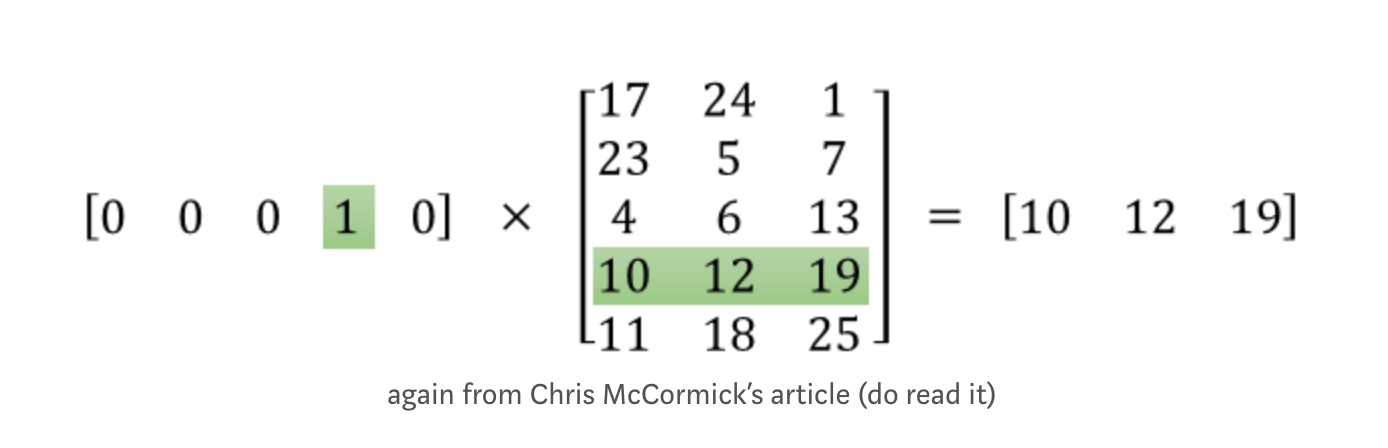

In [54]:
Image(filename='/Users/sayedali/Desktop/screenshot/S3.png')

**When we multiply the one hot vectors with W1 , we basically get access to the row of the of W1 which is in fact the embedded representation of the word represented by the input one hot vector. So W1is essentially acting as a look up table.**

In [55]:
vectors = sess.run(W1 + b1)

In [56]:
print(vectors)

[[-0.14357862 -0.08226126  0.2968992  -0.0859015  -1.6216816 ]
 [-1.1556067  -1.7633055  -0.29349464 -1.956896   -1.5266675 ]
 [-0.3154212  -2.6614518   0.58582354 -1.1557136  -0.0327332 ]
 [-2.171837   -0.7895138  -0.8628348   0.14815319 -0.7850785 ]
 [-1.4080204   1.2387564  -1.9493921  -2.2745461  -3.2389388 ]
 [-1.5170782  -1.2769172   0.10999715 -0.8502221  -0.518067  ]
 [-1.1866615  -2.814495    0.6047946  -1.0059438  -0.9605396 ]]


In [57]:
print(vectors[ word2int['queen'] ])

[-2.171837   -0.7895138  -0.8628348   0.14815319 -0.7850785 ]


## So what can we do with these beautiful beautiful vectors?

**Here’s a quick function to find the closest vector to a given vector.**

In [58]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1

    query_vector = vectors[word_index]

    for index, vector in enumerate(vectors):

        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):

            min_dist = euclidean_dist(vector, query_vector)
            min_index = index

    return min_index

**We will now query these vectors with ‘king’, ‘queen’ and ‘royal’**

In [59]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
is


In [60]:
#plot
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [61]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

he -0.93514246
is 0.570437
she -0.23360822
queen 0.9945896
royal 0.009399518
king -0.8617653
the -0.47227594


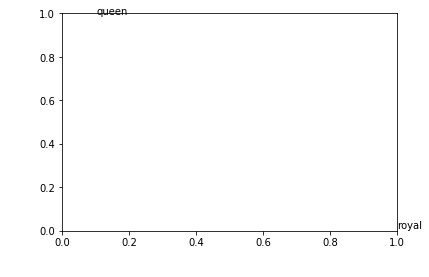

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))

plt.show()